# ***CARDIOVASCULAR DISEASE PREDICTION***

---


The aim of this project is to predict whether a person has cardiovascular disease or not based on various features.


**Importing the modules(or libraries)**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
data= pd.read_csv("/content/cardio_train.csv",delimiter=';')


**Preprocessing AND Exploratory Data Analysis**

In [3]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0.0


**Features:**
       

*   Age(in days)             
*   Gender (1-Female, 2-Male)
*   Height(in cm)
*   Weight(in kg)
*   Systolic blood pressure(ap_hi)
*   Diastolic blood pressure (ap_lo)
*   Cholesterol(1: normal, 2: above normal, 3: well above normal )
*   Glucose(1: normal, 2: above normal, 3: well above normal)
*   Smoking
*   Alcohol intake
*   Physical activity

**Target Value:**

> Cardio(0: Don't have Cardiovascular Disease, 1:Have Cardiovascular Disease)





In [4]:
data.shape

(49961, 13)

In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49960.000000
mean,35676.161566,19464.684094,1.346971,164.366166,74.230610,128.747183,96.972118,1.363504,1.225856,0.088209,0.053402,0.802626,0.499039
std,20609.537461,2469.041025,0.476011,8.190134,14.327859,154.515534,200.225599,0.677197,0.572023,0.283601,0.224835,0.398021,0.500004
min,0.000000,10798.000000,1.000000,55.000000,11.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17836.000000,17662.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35682.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,53508.000000,21321.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,71310.000000,23690.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49961 entries, 0 to 49960
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49961 non-null  int64  
 1   age          49961 non-null  int64  
 2   gender       49961 non-null  int64  
 3   height       49961 non-null  int64  
 4   weight       49961 non-null  float64
 5   ap_hi        49961 non-null  int64  
 6   ap_lo        49961 non-null  int64  
 7   cholesterol  49961 non-null  int64  
 8   gluc         49961 non-null  int64  
 9   smoke        49961 non-null  int64  
 10  alco         49961 non-null  int64  
 11  active       49961 non-null  int64  
 12  cardio       49960 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 5.0 MB


There is no null-value in the data

Since,there is no importance of **id** column in the data. So, drop it.

In [7]:
data.drop('id',axis=1,inplace=True)

Convert days into yearsof age

In [8]:
data['age']=round(data['age']//365.25)

Gender: 0-Female  1-Male

In [9]:
data['gender']=data['gender']-1

In [10]:
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0.0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1.0
2,51.0,0,165,64.0,130,70,3,1,0,0,0,1.0
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1.0
4,47.0,0,156,56.0,100,60,1,1,0,0,0,0.0


Divide Cholestrol and Glucose into three different levels separetely.

In [11]:
data['cholesterol']=data['cholesterol'].map({1:"N_Chol",2:"AN_Chol",3:"WAN_Chol"})
data['gluc']=data['gluc'].map({1:"N_Gluc",2:"AN_Gluc",3:"WAN_Gluc"})

In [12]:
data = pd.get_dummies(data, columns = ['cholesterol', 'gluc'])

In [13]:
data.rename(columns = {'cholesterol_WAN_Chol':'WAN_Chol','cholesterol_AN_Chol':'AN_Chol','cholesterol_N_Chol':'N_Chol',
                        'gluc_WAN_Gluc':'WAN_Gluc','gluc_AN_Gluc':'AN_Gluc','gluc_N_Gluc':'N_Gluc'}, inplace = True)
data

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,AN_Chol,N_Chol,WAN_Chol,AN_Gluc,N_Gluc,WAN_Gluc
0,50.0,1,168,62.0,110,80,0,0,1,0.0,0,1,0,0,1,0
1,55.0,0,156,85.0,140,90,0,0,1,1.0,0,0,1,0,1,0
2,51.0,0,165,64.0,130,70,0,0,0,1.0,0,0,1,0,1,0
3,48.0,1,169,82.0,150,100,0,0,1,1.0,0,1,0,0,1,0
4,47.0,0,156,56.0,100,60,0,0,0,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,51.0,1,170,85.0,130,80,0,0,1,1.0,0,1,0,0,1,0
49957,58.0,0,158,78.0,140,90,0,0,1,0.0,0,1,0,0,1,0
49958,44.0,1,168,72.0,120,80,1,0,1,0.0,0,1,0,1,0,0
49959,48.0,0,163,45.0,120,80,0,0,1,0.0,0,1,0,0,1,0



*   AN->Above Normal
*   N->Normal
*   WAN-> Well Above Normal

In [14]:
column_to_move = data.pop("cardio")
data.insert(15, "cardio", column_to_move)
data

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,AN_Chol,N_Chol,WAN_Chol,AN_Gluc,N_Gluc,WAN_Gluc,cardio
0,50.0,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0.0
1,55.0,0,156,85.0,140,90,0,0,1,0,0,1,0,1,0,1.0
2,51.0,0,165,64.0,130,70,0,0,0,0,0,1,0,1,0,1.0
3,48.0,1,169,82.0,150,100,0,0,1,0,1,0,0,1,0,1.0
4,47.0,0,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,51.0,1,170,85.0,130,80,0,0,1,0,1,0,0,1,0,1.0
49957,58.0,0,158,78.0,140,90,0,0,1,0,1,0,0,1,0,0.0
49958,44.0,1,168,72.0,120,80,1,0,1,0,1,0,1,0,0,0.0
49959,48.0,0,163,45.0,120,80,0,0,1,0,1,0,0,1,0,0.0


In [15]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,AN_Chol,N_Chol,WAN_Chol,AN_Gluc,N_Gluc,WAN_Gluc,cardio
age,1.000000,-0.018810,-0.079660,0.053336,0.019420,0.016827,-0.044928,-0.030300,-0.009840,0.020496,-0.126969,0.151069,0.022492,-0.084846,0.091976,0.236853
gender,-0.018810,1.000000,0.499767,0.151488,0.006058,0.016215,0.341154,0.169496,0.006495,-0.015139,0.034957,-0.031325,-0.003074,0.017285,-0.020221,0.003798
height,-0.079660,0.499767,1.000000,0.284791,0.008909,0.009228,0.190922,0.096101,-0.008585,-0.021713,0.050981,-0.046080,-0.014381,0.023779,-0.017832,-0.013913
weight,0.053336,0.151488,0.284791,1.000000,0.028658,0.042765,0.065025,0.068190,-0.017625,0.068710,-0.135287,0.110290,0.094001,-0.114914,0.062071,0.179729
ap_hi,0.019420,0.006058,0.008909,0.028658,1.000000,0.015236,-0.001436,0.001037,0.002187,0.013705,-0.024636,0.018795,0.004433,-0.010706,0.010037,0.055824
ap_lo,0.016827,0.016215,0.009228,0.042765,0.015236,1.000000,0.005479,0.011052,0.003767,0.017098,-0.023183,0.013144,0.012343,-0.014346,0.007151,0.062383
smoke,-0.044928,0.341154,0.190922,0.065025,-0.001436,0.005479,1.000000,0.335777,0.030823,0.024765,-0.017559,-0.002819,0.021663,-0.006603,-0.012430,-0.018811
alco,-0.030300,0.169496,0.096101,0.068190,0.001037,0.011052,0.335777,1.000000,0.030105,0.037984,-0.040771,0.014558,0.030673,-0.019629,-0.003774,-0.009692
active,-0.009840,0.006495,-0.008585,-0.017625,0.002187,0.003767,0.030823,0.030105,1.000000,-0.002504,-0.007923,0.013517,-0.009104,0.010154,-0.004700,-0.037967
AN_Chol,0.020496,-0.015139,-0.021713,0.068710,0.013705,0.017098,0.024765,0.037984,-0.002504,1.000000,-0.688214,-0.142211,0.273318,-0.158597,-0.055573,0.082730


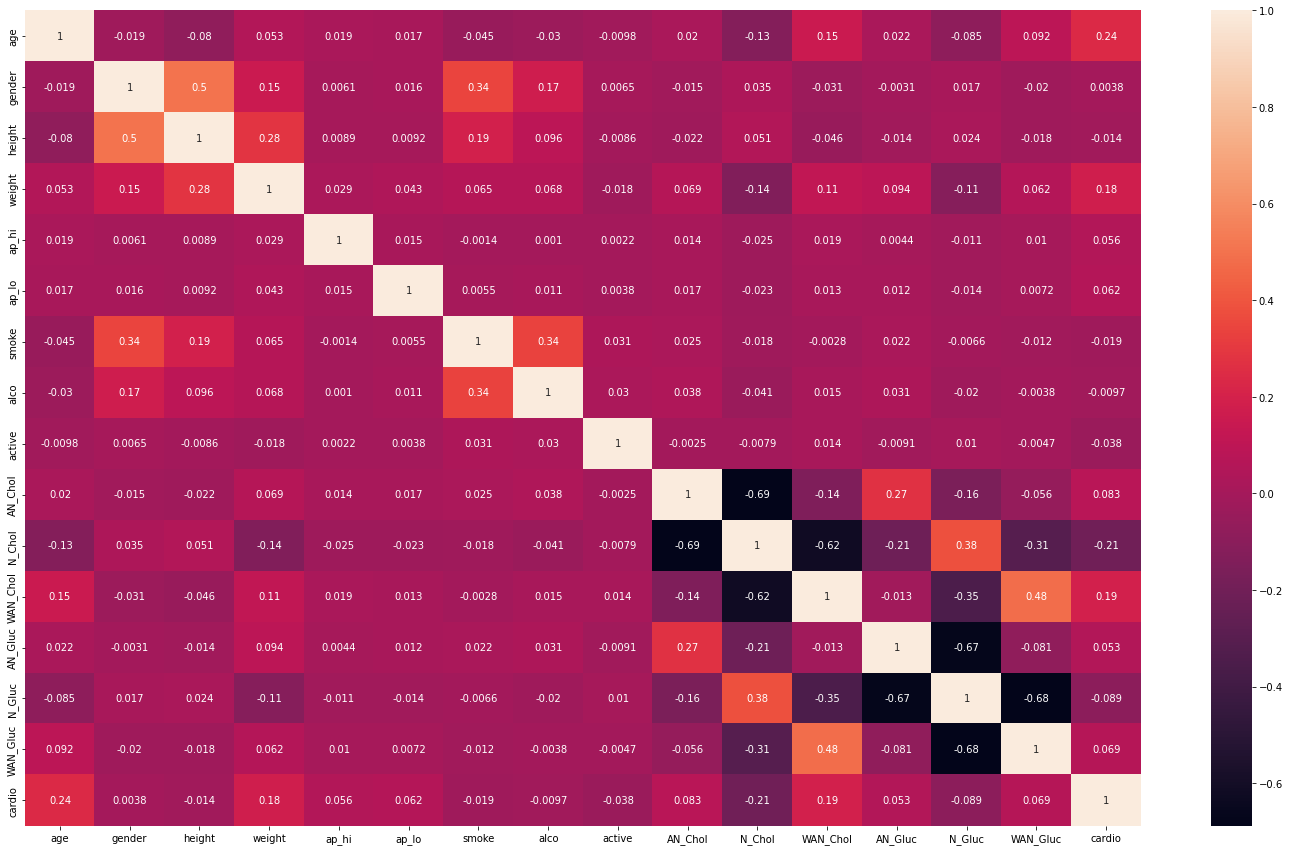

In [16]:
plt.figure(figsize = (25,15))
sns.heatmap(data.corr(),annot=True)                   
plt.show()

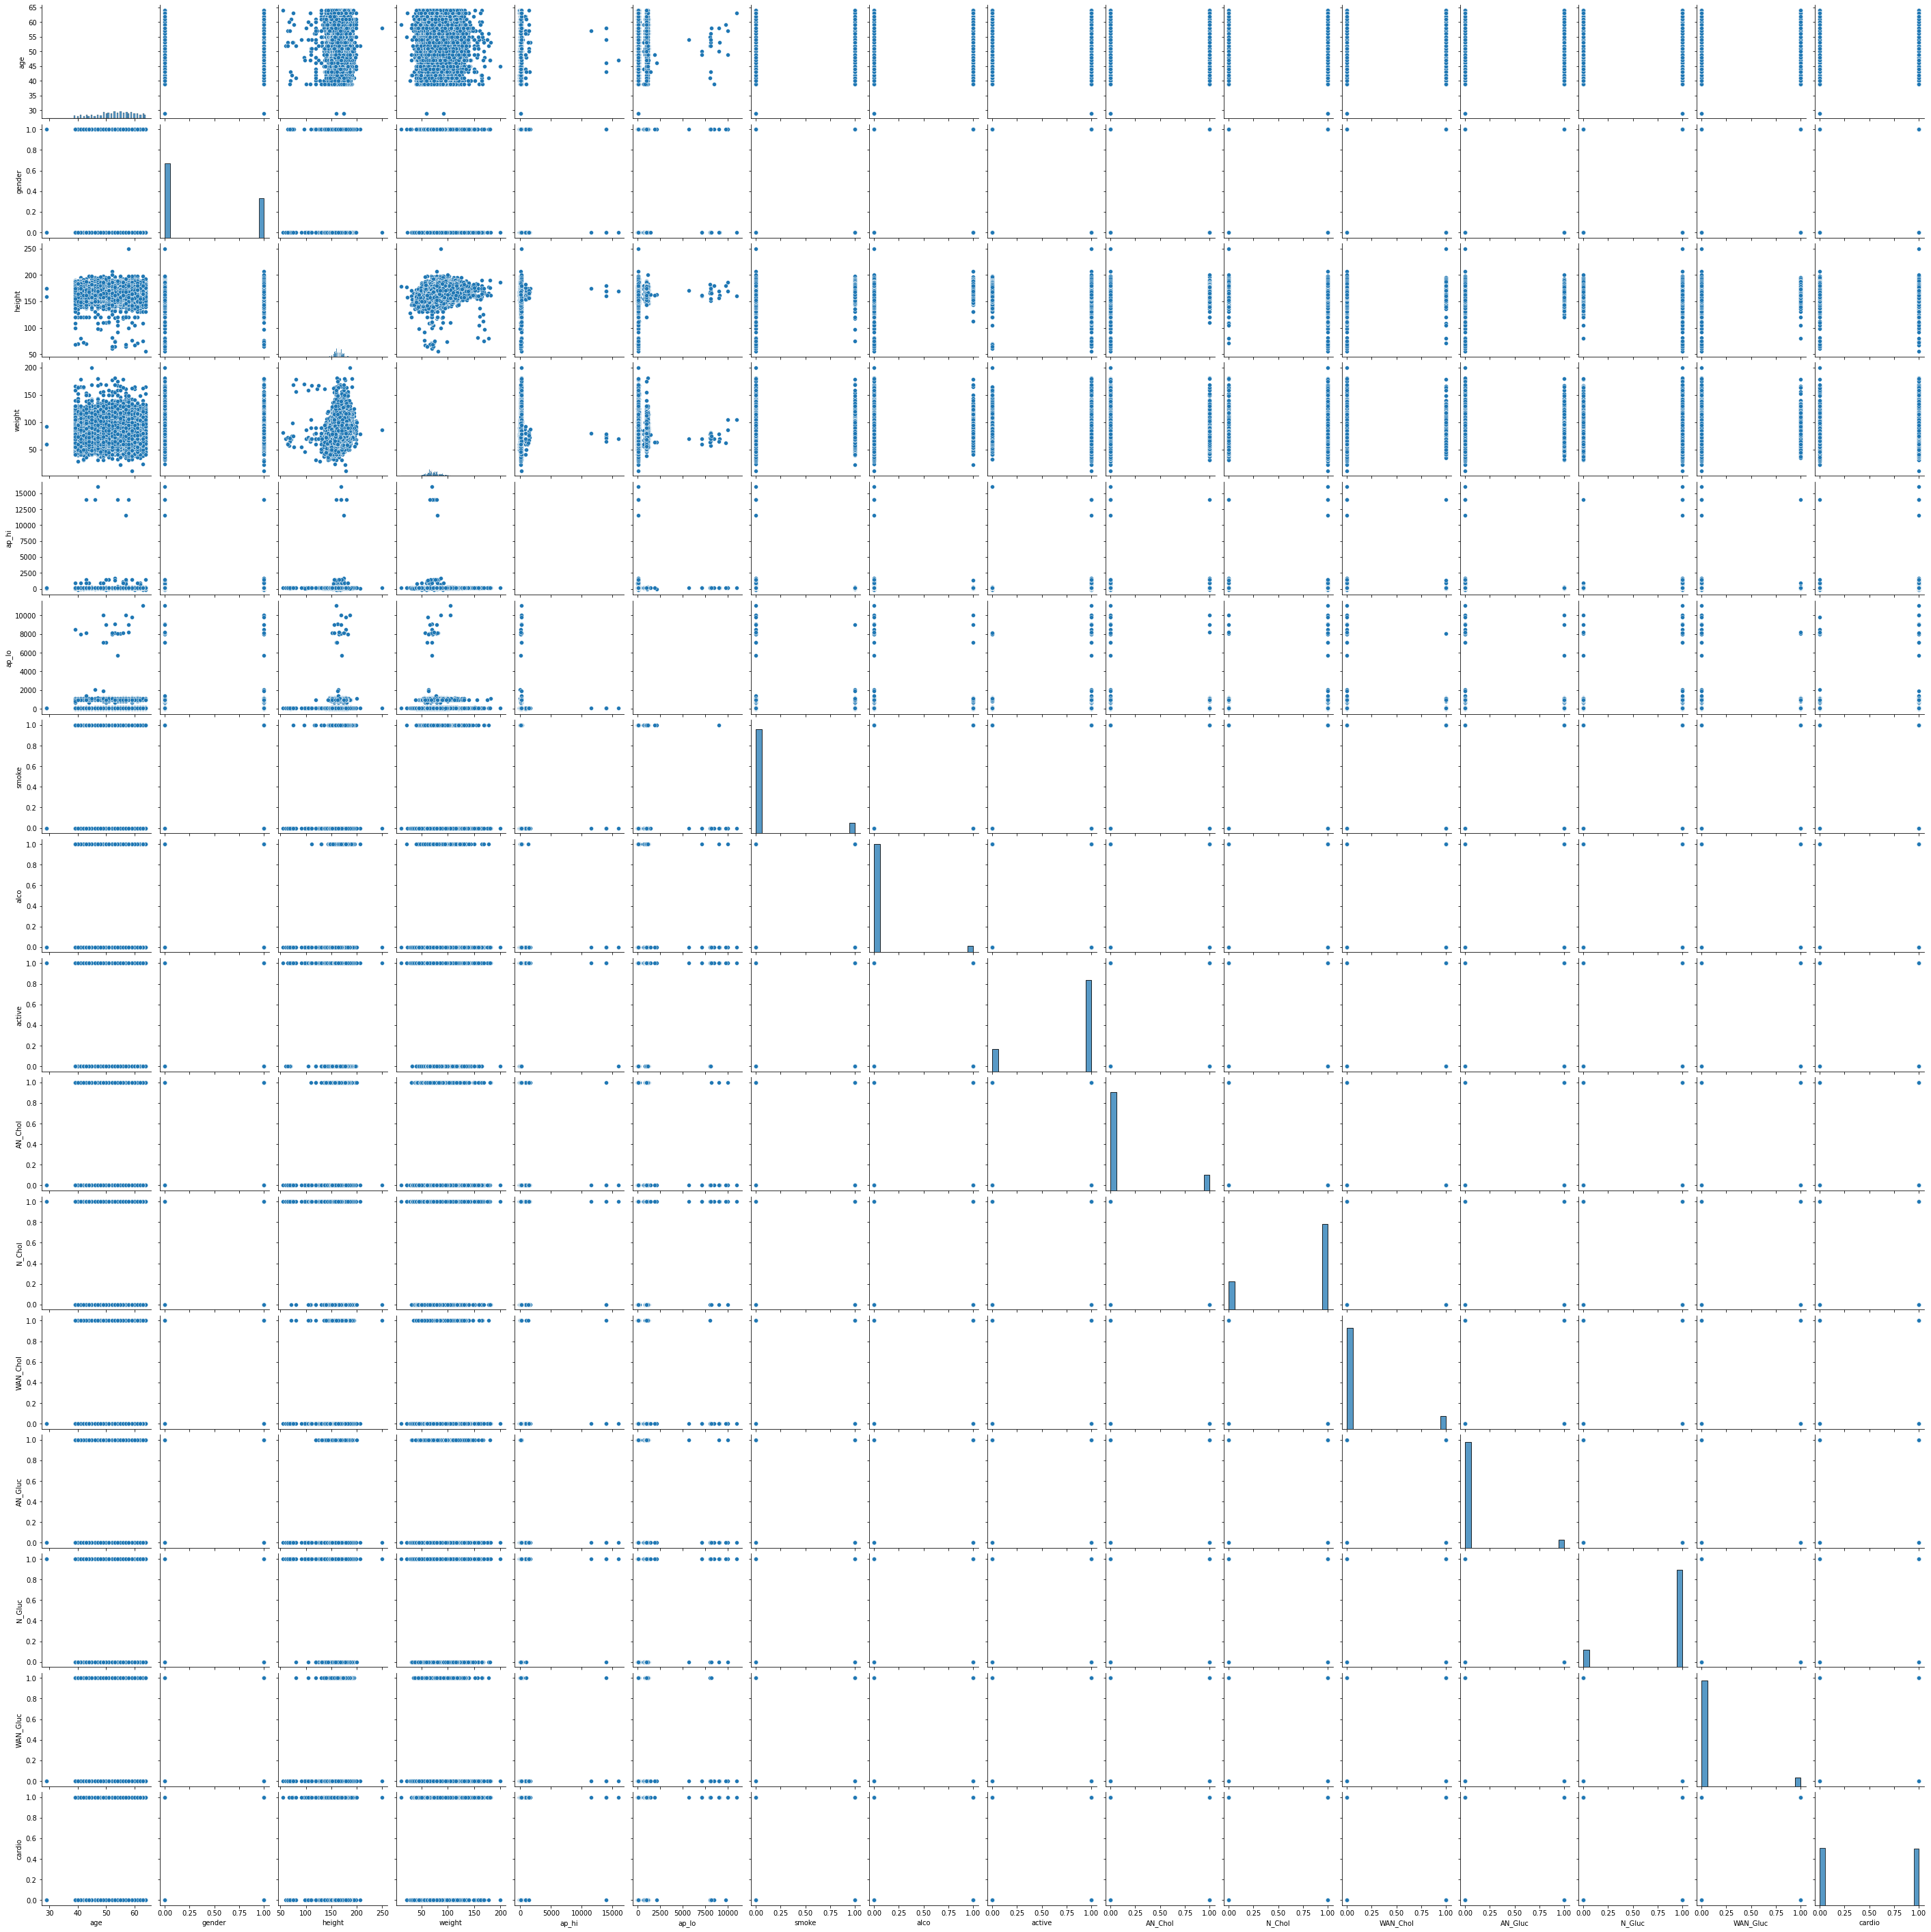

In [17]:
sns.pairplot(data)

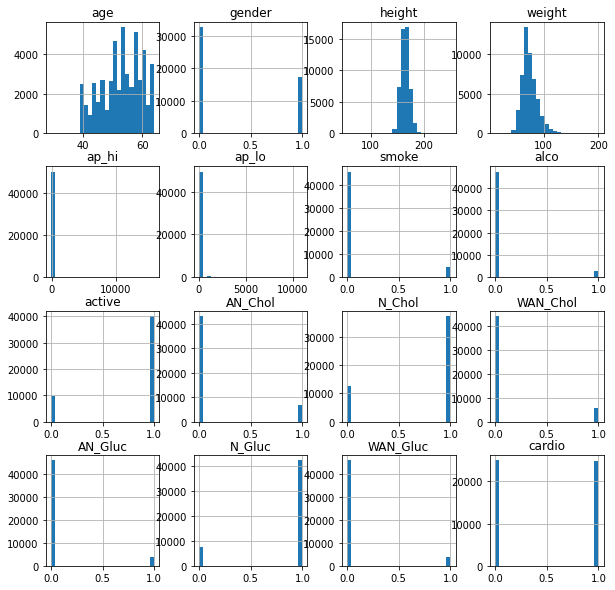

In [18]:
data.hist(bins=25,figsize=(10,10))
plt.show()   

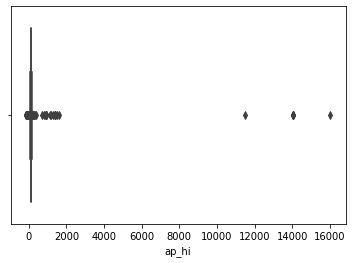

In [19]:
sns.boxplot(x=data['ap_hi'])

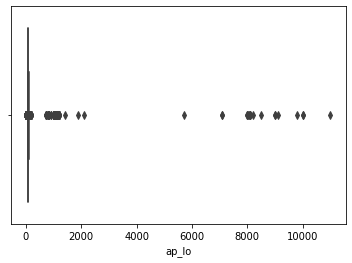

In [20]:
sns.boxplot(x=data['ap_lo'])

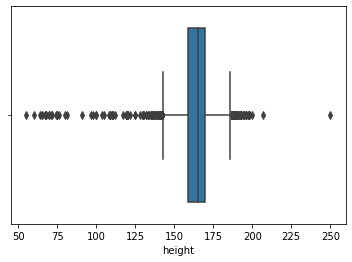

In [21]:
sns.boxplot(x=data['height'])

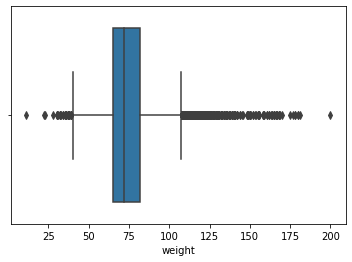

In [22]:
sns.boxplot(x=data['weight'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


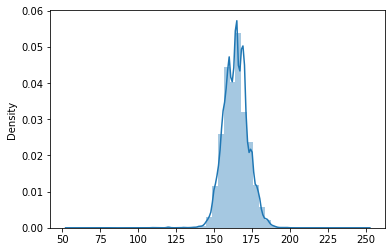

In [23]:
sns.distplot(x=data['height'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


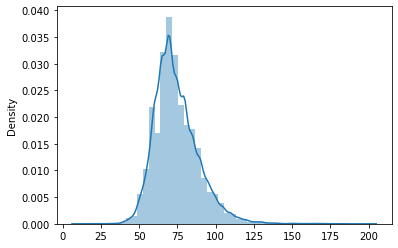

In [24]:
sns.distplot(x=data['weight'])

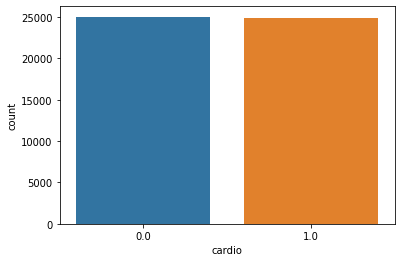

In [25]:
sns.countplot(x=data['cardio'])

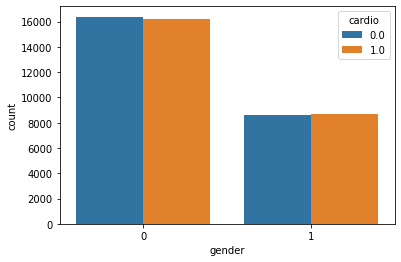

In [26]:
sns.countplot(x=data['gender'],hue=data['cardio'])

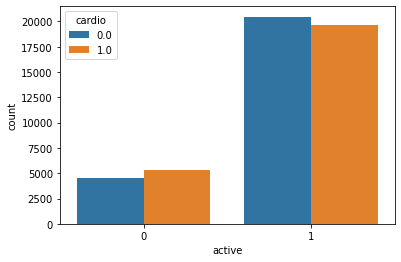

In [27]:
sns.countplot(x=data['active'],hue=data['cardio'])

In [28]:
def remove_outliers(arr):
    q1 = np.percentile(arr,25)
    q3 = np.percentile(arr,75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(0,len(arr)):
        if arr[i] >= upper_bound or arr[i] <= lower_bound:
            arr[i] = np.nan

In [29]:
remove_outliers(data['ap_hi'])
remove_outliers(data['ap_lo'])
remove_outliers(data['height'])
remove_outliers(data['weight'])
# data


<ipython-input-28-3de0f8763392>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
data

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,AN_Chol,N_Chol,WAN_Chol,AN_Gluc,N_Gluc,WAN_Gluc,cardio
0,50.0,1,168.0,62.0,110.0,80.0,0,0,1,0,1,0,0,1,0,0.0
1,55.0,0,156.0,85.0,140.0,90.0,0,0,1,0,0,1,0,1,0,1.0
2,51.0,0,165.0,64.0,130.0,70.0,0,0,0,0,0,1,0,1,0,1.0
3,48.0,1,169.0,82.0,150.0,100.0,0,0,1,0,1,0,0,1,0,1.0
4,47.0,0,156.0,56.0,100.0,NaN,0,0,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,51.0,1,170.0,85.0,130.0,80.0,0,0,1,0,1,0,0,1,0,1.0
49957,58.0,0,158.0,78.0,140.0,90.0,0,0,1,0,1,0,0,1,0,0.0
49958,44.0,1,168.0,72.0,120.0,80.0,1,0,1,0,1,0,1,0,0,0.0
49959,48.0,0,163.0,45.0,120.0,80.0,0,0,1,0,1,0,0,1,0,0.0


In [31]:
data=data.dropna()

In [32]:
data

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,AN_Chol,N_Chol,WAN_Chol,AN_Gluc,N_Gluc,WAN_Gluc,cardio
0,50.0,1,168.0,62.0,110.0,80.0,0,0,1,0,1,0,0,1,0,0.0
1,55.0,0,156.0,85.0,140.0,90.0,0,0,1,0,0,1,0,1,0,1.0
2,51.0,0,165.0,64.0,130.0,70.0,0,0,0,0,0,1,0,1,0,1.0
3,48.0,1,169.0,82.0,150.0,100.0,0,0,1,0,1,0,0,1,0,1.0
5,59.0,0,151.0,67.0,120.0,80.0,0,0,0,1,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49955,57.0,0,168.0,74.0,120.0,80.0,0,0,0,0,1,0,0,1,0,1.0
49956,51.0,1,170.0,85.0,130.0,80.0,0,0,1,0,1,0,0,1,0,1.0
49957,58.0,0,158.0,78.0,140.0,90.0,0,0,1,0,1,0,0,1,0,0.0
49958,44.0,1,168.0,72.0,120.0,80.0,1,0,1,0,1,0,1,0,0,0.0


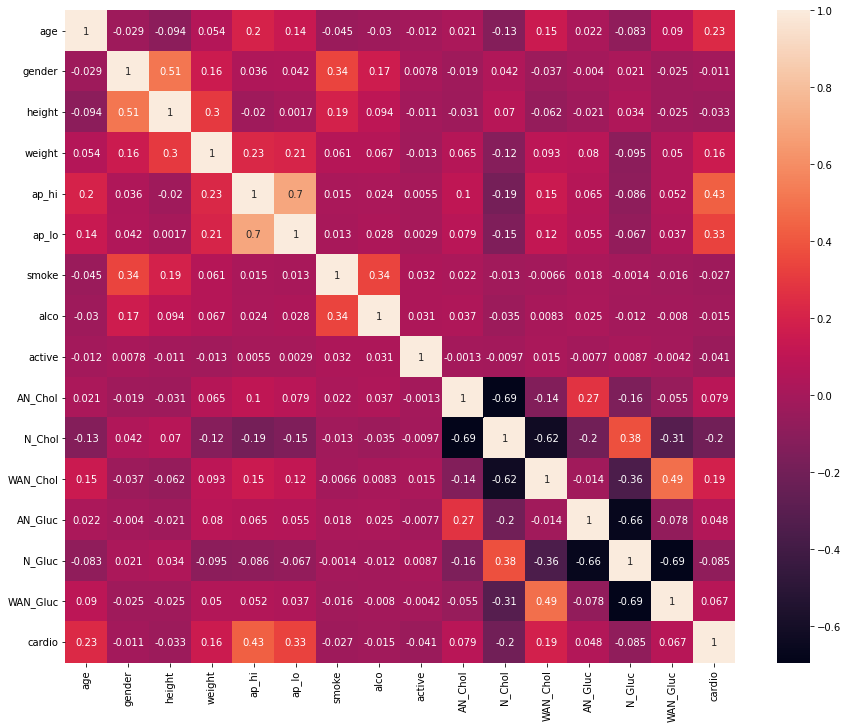

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

After the preprocessing, we can clearly see which feature contributes directly and indirectly to the output variable.



1.   Age, weight and WAN_Chol(Well_Above_Normal Cholesterol) contribute *positively* to the output.
2.   ap_hi(Systolic BP) and ap_lo(Diastolic BP) contribute *very positively* to the output.
3.   N_Chol(Normal Cholesterol) contribute *negatively* to the output.

Weight is also correlated to systolic and diastolic BP. Thus, if a person's weight increases his/her BP will also increase.


In [34]:
X = data.drop(['cardio'],axis=1)
Y = data['cardio']

In [35]:
X.shape

(44080, 15)

In [36]:
Y.shape

(44080,)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

***Model Training And Testing***

We are going to train and test our data on 5 model and compare the results:

*   Logistic Regression Classifier
*   Random Forest Classifier
*   Support Vector Machine
*   XGBoost


*1. LOGISTIC REGRESSION CLASSIFIER*

In [39]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train,Y_train)

LogisticRegression()

In [40]:
y_pred = classifier_lr.predict(X_test)

In [41]:
test_data_accuracy=accuracy_score(y_pred,Y_test)
print("Accuracy of Logistic Regression Model:",test_data_accuracy)

Accuracy of Logistic Regression Model: 0.7256125226860254


*2. RANDOM FOREST CLASSIFIER*

In [42]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
y_pred = classifier_rf.predict(X_test)

In [44]:
test_data_accuracy=accuracy_score(y_pred,Y_test)
print("Accuracy of Random Forest Model:",test_data_accuracy)

Accuracy of Random Forest Model: 0.7040607985480943


*3. SVM CLASSIFIER*

In [45]:
classifier_svm = SVC()
classifier_svm.fit(X_train, Y_train)

SVC()

In [46]:
y_pred = classifier_svm.predict(X_test)

In [47]:
test_data_accuracy=accuracy_score(y_pred,Y_test)
print("Accuracy of SVM Model:",test_data_accuracy)

Accuracy of SVM Model: 0.7313974591651543


*4. XGBOOST CLASSIFIER*

In [48]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, Y_train)

XGBClassifier()

In [49]:
y_pred = classifier_xgb.predict(X_test)

In [50]:
test_data_accuracy=accuracy_score(y_pred,Y_test)
print("Accuracy of XGBoost Model:",test_data_accuracy)

Accuracy of XGBoost Model: 0.7319646098003629


In medical classification, our main aim should be to reduce the number of false negative because we do not want our model to predict a person who is having the disease (class 1) as not having the disease (class 0).

The **XGBoost** model performs best all the other models in terms of accuracy.